# Web APIs & Classification part 2

## Data Cleaning & EDA

### Subreddit 1 - Singapore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords, wordnet

import re
from bs4 import BeautifulSoup

In [2]:
# read csv into a dataframe
df1 = pd.read_csv('.\datasets\sg_post.csv')

In [3]:
# keep relevant columns
df1 = df1[['subreddit', 'selftext', 'title']]
df1

,subreddit,selftext,title
0,singapore,"Talk about your day. Anything goes, but subre...",/r/singapore random discussion and small quest...
1,singapore,NaN,bots appearing on a local politician's ig page...
2,singapore,NaN,"More singles, fewer babies, slowest population..."
3,singapore,NaN,"Sunrises are a thing too, and it's sublime wat..."
4,singapore,Hi everyone.\n\nI’m a victim of a toxic family...,Toxic Family Victims Resource List
...,...,...,...
1859,singapore,NaN,#squadgoals
1860,singapore,NaN,When you get tired of waiting for your food so...
1861,singapore,NaN,[Meme Monday] YouTube Ads
1862,singapore,NaN,I'm making a video game that takes place in Si...


In [4]:
# removes duplicate rows based on all columns
df1 = df1.drop_duplicates()
df1

,subreddit,selftext,title
0,singapore,"Talk about your day. Anything goes, but subre...",/r/singapore random discussion and small quest...
1,singapore,NaN,bots appearing on a local politician's ig page...
2,singapore,NaN,"More singles, fewer babies, slowest population..."
3,singapore,NaN,"Sunrises are a thing too, and it's sublime wat..."
4,singapore,Hi everyone.\n\nI’m a victim of a toxic family...,Toxic Family Victims Resource List
...,...,...,...
1859,singapore,NaN,#squadgoals
1860,singapore,NaN,When you get tired of waiting for your food so...
1861,singapore,NaN,[Meme Monday] YouTube Ads
1862,singapore,NaN,I'm making a video game that takes place in Si...


In [5]:
# check for nan values
df1.isnull().sum()

subreddit      0
selftext     727
title          0
dtype: int64

In [6]:
# fill na values in selftext with values in corresponding title column
df1['selftext'].fillna('', inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
# check for nan values
df1.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [8]:
# new col of selftext and title
df1['combined'] = df1['selftext'] + ' ' + df1['title']

<ipython-input-8-4875add8b834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['combined'] = df1['selftext'] + ' ' + df1['title']


In [9]:
df1

,subreddit,selftext,title,combined
0,singapore,"Talk about your day. Anything goes, but subre...",/r/singapore random discussion and small quest...,"Talk about your day. Anything goes, but subre..."
1,singapore,,bots appearing on a local politician's ig page...,bots appearing on a local politician's ig pag...
2,singapore,,"More singles, fewer babies, slowest population...","More singles, fewer babies, slowest populatio..."
3,singapore,,"Sunrises are a thing too, and it's sublime wat...","Sunrises are a thing too, and it's sublime wa..."
4,singapore,Hi everyone.\n\nI’m a victim of a toxic family...,Toxic Family Victims Resource List,Hi everyone.\n\nI’m a victim of a toxic family...
...,...,...,...,...
1859,singapore,,#squadgoals,#squadgoals
1860,singapore,,When you get tired of waiting for your food so...,When you get tired of waiting for your food s...
1861,singapore,,[Meme Monday] YouTube Ads,[Meme Monday] YouTube Ads
1862,singapore,,I'm making a video game that takes place in Si...,I'm making a video game that takes place in S...


In [10]:
# save to csv
df1.to_csv(r'.\datasets\sg_duplicates_removed.csv', index = False)

### Subreddit 2 - Japan

In [11]:
# read csv into a dataframe
df2 = pd.read_csv('./datasets/jp_post.csv')

In [12]:
# keep relavant columns
df2 = df2[['subreddit', 'selftext', 'title']]
df2

,subreddit,selftext,title
0,japan,# THE /r/JAPAN BASIC QUESTIONS THREAD (June 20...,THE /R/JAPAN BASIC QUESTIONS THREAD (June 2021)
1,japan,NaN,Pfizer vaccine supplies to Japan will signific...
2,japan,NaN,Korea’s ‘innotech’ economy maddens analog Japan
3,japan,NaN,Myanmar soccer player in Japan to file for asylum
4,japan,I hope this is the correct Sub for this Questi...,Are there japanese communitys or citys in Brazil?
...,...,...,...
1893,japan,NaN,Japan provides their finest meeting room for w...
1894,japan,NaN,Japan Parliament passes Bill to provide free C...
1895,japan,NaN,This group of gentlemen bobbing their heads
1896,japan,NaN,"“1890, a western tourist pays to wear a samura..."


In [13]:
# removes duplicate rows based on all columns
df2 = df2.drop_duplicates()
df2

,subreddit,selftext,title
0,japan,# THE /r/JAPAN BASIC QUESTIONS THREAD (June 20...,THE /R/JAPAN BASIC QUESTIONS THREAD (June 2021)
1,japan,NaN,Pfizer vaccine supplies to Japan will signific...
2,japan,NaN,Korea’s ‘innotech’ economy maddens analog Japan
3,japan,NaN,Myanmar soccer player in Japan to file for asylum
4,japan,I hope this is the correct Sub for this Questi...,Are there japanese communitys or citys in Brazil?
...,...,...,...
1893,japan,NaN,Japan provides their finest meeting room for w...
1894,japan,NaN,Japan Parliament passes Bill to provide free C...
1895,japan,NaN,This group of gentlemen bobbing their heads
1896,japan,NaN,"“1890, a western tourist pays to wear a samura..."


In [14]:
# check for nan values
df2.isnull().sum()

subreddit      0
selftext     598
title          0
dtype: int64

In [15]:
# fill na values in selftext with values in corresponding title column
df2['selftext'].replace(np.nan, '', inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [16]:
# check for nan values
df2.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [17]:
df2["combined"] = df2["selftext"]+ " " + df2["title"]

<ipython-input-17-874fe0a74a03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["combined"] = df2["selftext"]+ " " + df2["title"]


In [18]:
df2

,subreddit,selftext,title,combined
0,japan,# THE /r/JAPAN BASIC QUESTIONS THREAD (June 20...,THE /R/JAPAN BASIC QUESTIONS THREAD (June 2021),# THE /r/JAPAN BASIC QUESTIONS THREAD (June 20...
1,japan,,Pfizer vaccine supplies to Japan will signific...,Pfizer vaccine supplies to Japan will signifi...
2,japan,,Korea’s ‘innotech’ economy maddens analog Japan,Korea’s ‘innotech’ economy maddens analog Japan
3,japan,,Myanmar soccer player in Japan to file for asylum,Myanmar soccer player in Japan to file for as...
4,japan,I hope this is the correct Sub for this Questi...,Are there japanese communitys or citys in Brazil?,I hope this is the correct Sub for this Questi...
...,...,...,...,...
1893,japan,,Japan provides their finest meeting room for w...,Japan provides their finest meeting room for ...
1894,japan,,Japan Parliament passes Bill to provide free C...,Japan Parliament passes Bill to provide free ...
1895,japan,,This group of gentlemen bobbing their heads,This group of gentlemen bobbing their heads
1896,japan,,"“1890, a western tourist pays to wear a samura...","“1890, a western tourist pays to wear a samur..."


In [19]:
# save to csv
df2.to_csv(r'.\datasets\jp_duplicates_removed.csv', index = False)

In [20]:
# append both singapore and japan dataframe together
merged = df1.append(df2, ignore_index = True)

In [21]:
merged

,subreddit,selftext,title,combined
0,singapore,"Talk about your day. Anything goes, but subre...",/r/singapore random discussion and small quest...,"Talk about your day. Anything goes, but subre..."
1,singapore,,bots appearing on a local politician's ig page...,bots appearing on a local politician's ig pag...
2,singapore,,"More singles, fewer babies, slowest population...","More singles, fewer babies, slowest populatio..."
3,singapore,,"Sunrises are a thing too, and it's sublime wat...","Sunrises are a thing too, and it's sublime wa..."
4,singapore,Hi everyone.\n\nI’m a victim of a toxic family...,Toxic Family Victims Resource List,Hi everyone.\n\nI’m a victim of a toxic family...
...,...,...,...,...
1796,japan,,Japan provides their finest meeting room for w...,Japan provides their finest meeting room for ...
1797,japan,,Japan Parliament passes Bill to provide free C...,Japan Parliament passes Bill to provide free ...
1798,japan,,This group of gentlemen bobbing their heads,This group of gentlemen bobbing their heads
1799,japan,,"“1890, a western tourist pays to wear a samura...","“1890, a western tourist pays to wear a samur..."


In [22]:
merged.to_csv(r'.\datasets\merged_wo_duplicates.csv', index = False)

In [23]:
# convert subreddit into binary labels. 0 for japan and 1 for singapore
merged['subreddit'] = merged['subreddit'].map({'japan': 0, 'singapore': 1})
merged.head()

,subreddit,selftext,title,combined
0,1,"Talk about your day. Anything goes, but subre...",/r/singapore random discussion and small quest...,"Talk about your day. Anything goes, but subre..."
1,1,,bots appearing on a local politician's ig page...,bots appearing on a local politician's ig pag...
2,1,,"More singles, fewer babies, slowest population...","More singles, fewer babies, slowest populatio..."
3,1,,"Sunrises are a thing too, and it's sublime wat...","Sunrises are a thing too, and it's sublime wa..."
4,1,Hi everyone.\n\nI’m a victim of a toxic family...,Toxic Family Victims Resource List,Hi everyone.\n\nI’m a victim of a toxic family...


## Preprocessing and EDA

In [24]:
# remove urls
merged['combined'] = merged['combined'].str.replace('http\S+|www.\S+', '', case = False, regex = True)

In [25]:
# remove html tags function
def remove_tags(string):
    result = BeautifulSoup(string).get_text()
    return result

merged['combined'] = merged['combined'].apply(lambda x: remove_tags(x))

In [26]:
# remove non-letter function
def remove_nonletter(string):
    result = re.sub('[^a-zA-Z]', ' ', string)
    return result

merged['combined'] = merged['combined'].apply(lambda x: remove_nonletter(x))

In [27]:
# remove white space at both ends
merged['combined'] = merged['combined'].str.strip()

In [28]:
# remove middle big spaces function
def remove_bigmiddle_spaces(string):
    result = re.sub(' +', ' ', string)
    return result

merged['combined'] = merged['combined'].apply(lambda x: remove_bigmiddle_spaces(x))

In [29]:
# convert to lower case
merged['combined'] = merged['combined'].str.lower()

In [30]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer('\s+', gaps=True)

# return tokenized col
merged['combined'] = merged['combined'].map(tokenizer.tokenize)

In [31]:
merged

,subreddit,selftext,title,combined
0,1,"Talk about your day. Anything goes, but subre...",/r/singapore random discussion and small quest...,"[talk, about, your, day, anything, goes, but, ..."
1,1,,bots appearing on a local politician's ig page...,"[bots, appearing, on, a, local, politician, s,..."
2,1,,"More singles, fewer babies, slowest population...","[more, singles, fewer, babies, slowest, popula..."
3,1,,"Sunrises are a thing too, and it's sublime wat...","[sunrises, are, a, thing, too, and, it, s, sub..."
4,1,Hi everyone.\n\nI’m a victim of a toxic family...,Toxic Family Victims Resource List,"[hi, everyone, i, m, a, victim, of, a, toxic, ..."
...,...,...,...,...
1796,0,,Japan provides their finest meeting room for w...,"[japan, provides, their, finest, meeting, room..."
1797,0,,Japan Parliament passes Bill to provide free C...,"[japan, parliament, passes, bill, to, provide,..."
1798,0,,This group of gentlemen bobbing their heads,"[this, group, of, gentlemen, bobbing, their, h..."
1799,0,,"“1890, a western tourist pays to wear a samura...","[a, western, tourist, pays, to, wear, a, samur..."


In [32]:
def pos_tagger(nltk_tag):
    """map tags to part of speech names in wordnet"""
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [33]:
lemmatizer = WordNetLemmatizer()

def pos_lem(post):
    """return lemmatized words"""
    pos_tagged = nltk.pos_tag(post)
    tag_1 = map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged)
    lem = [lemmatizer.lemmatize(word, pos = tag) if tag != None else lemmatizer.lemmatize(word) for word, tag in tag_1]
    return(lem)

merged['pos_lem'] = merged['combined'].apply(pos_lem)

In [34]:
merged.head()

,subreddit,selftext,title,combined,pos_lem
0,1,"Talk about your day. Anything goes, but subre...",/r/singapore random discussion and small quest...,"[talk, about, your, day, anything, goes, but, ...","[talk, about, your, day, anything, go, but, su..."
1,1,,bots appearing on a local politician's ig page...,"[bots, appearing, on, a, local, politician, s,...","[bot, appear, on, a, local, politician, s, ig,..."
2,1,,"More singles, fewer babies, slowest population...","[more, singles, fewer, babies, slowest, popula...","[more, single, few, baby, slowest, population,..."
3,1,,"Sunrises are a thing too, and it's sublime wat...","[sunrises, are, a, thing, too, and, it, s, sub...","[sunrise, be, a, thing, too, and, it, s, subli..."
4,1,Hi everyone.\n\nI’m a victim of a toxic family...,Toxic Family Victims Resource List,"[hi, everyone, i, m, a, victim, of, a, toxic, ...","[hi, everyone, i, m, a, victim, of, a, toxic, ..."


In [35]:
def stop_words_removed(s):
    """return a list of non stop words"""
    # eng stopwords
    my_stopwords = stopwords.words('english')
    my_stopwords.extend(["japan", "singapore", "japanese", "sg", "singaporean", "singaporeans", "pore", "people", "like", 
                         "would", "get", "one", "going", "want", "know", "time", "help", "years", "way", "say", "new", 
                         "says", "work", "really", "think", "covid", "prices", "school", "children", "pay", "looking",
                         "live", "numbers", "good", "real", "company", "foreign", "look", "long", "day", "map", "police",
                         "price", "year", "use", "try", "number", "make", "come", "post", "vaccine", "child", "pass", "cost",
                         "kid", "phone", "thing", "need", "change", "high", "land", "buy", "start", "parent", "experience",
                         "friend", "board", "island", "financial", "question", "leave", "space", "woman", "big", "city",
                         "thanks", "information", "man", "university", "arrest", "weak", "old", "receive", "track", 
                         "vaccination", "ship", "tell", "ask", "case", "chinese", "hope", "month", "place", "video", "group",
                         "money", "feel", "scam", "lot", "sure", "edit", "local", "job", "hate", "country", "point", "tax", 
                         "wonder", "different", "charge", "extremely", "american", "culture", "card", "racist", "bear", "order",
                         "thought", "article", "watch", "speak", "let", "source", "read", "rule", "person", "car", "advice",
                         "pride", "bad", "state", "tv", "age", "visa", "idea", "stuff", "follow", "service", "little", "today",
                         "million", "week", "vaccinate"
                        ])
    
    s = [w for w in s if w not in my_stopwords]
    return s

# apply to combined col
merged = merged.assign(col_final = merged['pos_lem'].apply(lambda x: stop_words_removed(x)))
# join tokens
merged['col_final'] = merged['col_final'].apply(lambda x: " ".join(x))

The additional stopwords apart from Japan and Singapore consist of the common words appearing in both subreddits and the top words causing misclassification. Due to the current pandemic, words relating to it were shown in both subreddit. For example, 'covid' and 'vaccination'. They were removed as stopwords.

In [36]:
merged

,subreddit,selftext,title,combined,pos_lem,col_final
0,1,"Talk about your day. Anything goes, but subre...",/r/singapore random discussion and small quest...,"[talk, about, your, day, anything, goes, but, ...","[talk, about, your, day, anything, go, but, su...",talk anything go subreddit still apply please ...
1,1,,bots appearing on a local politician's ig page...,"[bots, appearing, on, a, local, politician, s,...","[bot, appear, on, a, local, politician, s, ig,...",bot appear politician ig page defend snowflake...
2,1,,"More singles, fewer babies, slowest population...","[more, singles, fewer, babies, slowest, popula...","[more, single, few, baby, slowest, population,...",single baby slowest population growth since hi...
3,1,,"Sunrises are a thing too, and it's sublime wat...","[sunrises, are, a, thing, too, and, it, s, sub...","[sunrise, be, a, thing, too, and, it, s, subli...",sunrise sublime dark lighten
4,1,Hi everyone.\n\nI’m a victim of a toxic family...,Toxic Family Victims Resource List,"[hi, everyone, i, m, a, victim, of, a, toxic, ...","[hi, everyone, i, m, a, victim, of, a, toxic, ...",hi everyone victim toxic family toxicity form ...
...,...,...,...,...,...,...
1796,0,,Japan provides their finest meeting room for w...,"[japan, provides, their, finest, meeting, room...","[japan, provide, their, fine, meeting, room, f...",provide fine meeting room world leader g summi...
1797,0,,Japan Parliament passes Bill to provide free C...,"[japan, parliament, passes, bill, to, provide,...","[japan, parliament, pass, bill, to, provide, f...",parliament bill provide free
1798,0,,This group of gentlemen bobbing their heads,"[this, group, of, gentlemen, bobbing, their, h...","[this, group, of, gentleman, bob, their, head]",gentleman bob head
1799,0,,"“1890, a western tourist pays to wear a samura...","[a, western, tourist, pays, to, wear, a, samur...","[a, western, tourist, pay, to, wear, a, samura...",western tourist wear samurai armor og weeb laf...


In [37]:
# rename y label column
merged.rename(columns = {'subreddit': 'ylabel'}, inplace=True)

In [38]:
# save to csv
merged.to_csv(r'.\datasets\merged.csv', index = False)

In [39]:
# set up X and y
X = merged['col_final']
y = merged['ylabel']

In [40]:
X

0       talk anything go subreddit still apply please ...
1       bot appear politician ig page defend snowflake...
2       single baby slowest population growth since hi...
3                            sunrise sublime dark lighten
4       hi everyone victim toxic family toxicity form ...
                              ...                        
1796    provide fine meeting room world leader g summi...
1797                         parliament bill provide free
1798                                   gentleman bob head
1799    western tourist wear samurai armor og weeb laf...
1800    germany sharp break china focus instead strong...
Name: col_final, Length: 1801, dtype: object

In [41]:
# baseline accuracy
y.value_counts(normalize = True)

1    0.543032
0    0.456968
Name: ylabel, dtype: float64

## Preprocessing & Modeling

In [42]:
# define train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 32)

In [43]:
# pipelines
pipe_1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

pipe_2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

pipe_3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('svc', SVC())
])

pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svc', SVC())
])

pipe7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe8 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])



### Logistic Regression

#### Pipe 1 - with CountVectorizer

In [44]:
# search over following hyperparameters
pipe_params_1 = {
    'cvec__max_features': [800, 1000], # max number of features fit
    'cvec__min_df': [5, 6], # min number of documents needed to include token
    'cvec__max_df': [0.7, 0.8], # max number of documents needed to include token
    'cvec__ngram_range': [(1, 1), (1, 2)], # check individual tokens and 2-grams
    'cvec__stop_words': ['english', None],
    'lr__C': [0.1, 1],
    'lr__penalty': ['l2']
}

In [45]:
# gridsearch on pipe_1
gs1 = GridSearchCV(pipe_1,
                   param_grid = pipe_params_1,
                   cv= 5)

In [46]:
# fit on train
gs1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.7, 0.8],
                         'cvec__max_features': [800, 1000],
                         'cvec__min_df': [5, 6],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'lr__C': [0.1, 1], 'lr__penalty': ['l2']})

In [47]:
# cross validated best score
gs1.best_score_

0.72

In [48]:
# best hyperparameters
gs1.best_params_

{'cvec__max_df': 0.7,
 'cvec__max_features': 1000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english',
 'lr__C': 0.1,
 'lr__penalty': 'l2'}

In [49]:
# save best model as gs_model
gs1_model = gs1.best_estimator_
gs1_model

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.7, max_features=1000, min_df=5,
                                 ngram_range=(1, 2), stop_words='english')),
                ('lr', LogisticRegression(C=0.1))])

In [50]:
gs1_model.named_steps['cvec']

CountVectorizer(max_df=0.7, max_features=1000, min_df=5, ngram_range=(1, 2),
                stop_words='english')

In [51]:
# accuracy score on train set
gs1_model.score(X_train, y_train)

0.8325925925925926

In [52]:
# accuracy score on test set
gs1_model.score(X_test, y_test)

0.7560975609756098

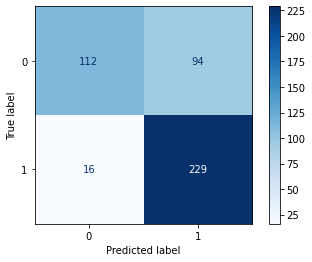

In [53]:
# confusion matrix of test dataset
plot_confusion_matrix(gs1_model.named_steps['lr'], gs1_model.named_steps['cvec'].transform(X_test), y_test, cmap='Blues', values_format='d');

In [54]:
# Display all columns in jupyter notebook
pd.set_option('display.expand_frame_repr', False)

#### Features used

In [55]:
# df of features
cvec1 = gs1_model.named_steps['cvec']
pd.set_option("display.max_columns", None)
df_1 = pd.DataFrame(cvec1.fit_transform(X_train).toarray(), columns = cvec1.get_feature_names())
df_1

,able,absolutely,abuse,accept,accord,account,accuse,act,action,activity,actually,add,address,admit,advance,affect,afraid,agent,ago,agree,ahead,air,alert,allow,alot,alternative,amazon,america,amid,angry,animal,anime,announce,answer,anti,anybody,anymore,anyways,apologise,app,apparently,appeal,appear,apple,application,apply,apply polite,appointment,appreciate,approach,april,area,argument,arm,art,asahi,asahi shimbun,assault,assume,attack,attend,attention,attract,australia,available,average,avoid,aware,away,baby,background,ban,bank,bar,base,basic,basically,basis,battle,bay,beat,begin,behaviour,believe,benefit,best,bias,birthday,bit,black,blame,blind,block,blood,body,book,bos,box,boy,brand,breach,break,breaker,bridge,bring,brother,build,building,bukit,bukit merah,bunch,bus,business,campaign,cancel,care,carry,cash,casual,cat,catch,cause,center,centre,certain,certainly,challenge,chance,character,chat,cheap,check,china,chip,choice,choose,chu,chu kang,circuit,circuit breaker,circumstance,citizen,citizenship,claim,clarify,class,clear,clearly,clinic,close,closure,club,cluster,code,collect,com,comment,commit,common,community,commute,compare,complain,complete,completely,component,computer,concern,condition,condo,confirm,confuse,consider,constantly,construction,contact,context,continue,contract,contribute,control,conversation,cool,cop,coronavirus,correct,count,couple,course,court,cover,crash,cream,create,credit,crisis,crowd,cultural,curious,current,currently,customer,cut,cycle,cyclist,daily,damn,dance,data,date,db,deal,death,death ray,debate,debt,decade,decent,decide,decision,defense,definitely,degree,delete,deliver,delivery,demand,depend,design,despite,develop,die,difference,difficult,digital,dinner,directly,discussion,discussion small,distance,doctor,dollar,donate,donation,dont,dos,dose,dot,double,doubt,dr,draw,drink,drive,driver,drop,drug,duty,early,earn,easily,east,easy,eat,economic,economy,editorial,educate,education,effect,effective,effort,elderly,election,email,embassy,emergency,emotional,employ,employee,employer,encourage,end,english,enjoy,ensure,enter,entire,entirely,environment,equal,especially,essentially,event,eventually,evidence,exactly,example,exist,expect,expert,explain,export,express,extend,extra,eye,face,facebook,fact,fail,fair,fall,family,family member,famous,fan,far,fast,father,fault,fear,fee,feedback,feeling,fellow,felt,female,fight,figure,file,film,finally,fine,finish,fish,fix,flag,fly,focus,folk,food,football,force,foreigner,forget,form,forward,free,fresh,fuck,fully,fun,fund,future,gain,game,garden,gay,gender,general,generally,generation,giant,gift,girl,google,gov,government,grab,graduate,grateful,grc,grc death,great,greatly,green,grow,guard,guess,guy,haha,half,hand,handle,hang,happen,happy,harassment,hard,hari raya,harmony,hawker,hdb,head,health,hear,heart,heighten,heighten alert,hell,hello,helpful,hey,hi,hide,highly,hire,history,hit,hold,holiday,home,honestly,hop,hospital,hot,hour,house,household,housing,huge,human,ice,id,identify,ignore,illegal,im,imagine,immediately,immigration,import,important,improve,incident,include,income,increase,indian,individual,indonesia,industry,infect,infection,info,input,inside,instagram,instance,instead,insurance,intend,interaction,interested,international,internet,interview,involve,issue,item,ive,jab,jail,join,joke,jp,july,jump,june,jurong,kang,kill,kind,king,kit,knowledge,korea,korean,labor,lack,lady,language,large,late,later,laugh,law,lead,leader,learn,legal,letter,level,lgbt,license,lie,life,lifestyle,light,likely,limit,line,link,list,listen,literally,living,locally,location,lol,longer,lose,love,low,machine,main,maintenance,major,majority,malay,malaysia,male,mall,manage,management,mandatory,market,mask,mass,match,matter,maybe,mean,measure,medical,medium,meet,meeting,member,meme,men,mental,mental health,mention,merah,merah view,merely,message,method,middle,migrant,military,min,mind,minister,minor,minute,miss,mistake,mix,moderna,moh,mom,moment,morning,mother,movie,mrt,nation,national,n

##### Plot most common words in each subreddit

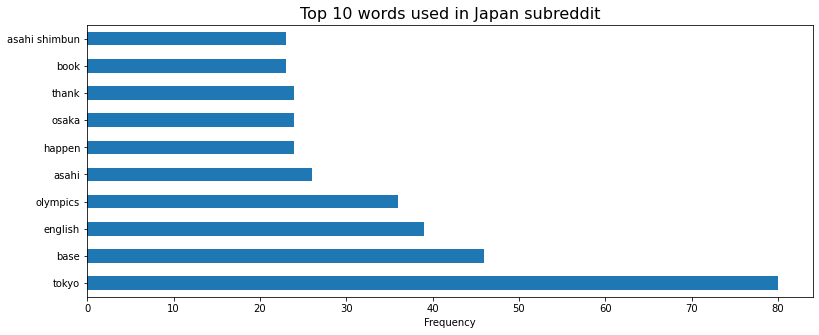

In [56]:
# Plot most common words in each subreddit
y_df = pd.DataFrame(y_train).reset_index(drop=True)
yandx = pd.concat([df_1,y_df], axis = 1)

# split df according to 0 and 1 in ylabel
dfa, dfb = [x for _, x in yandx.groupby(yandx['ylabel'] == 1)]

# japan
dfa1 = dfa.drop(['ylabel'], axis = 1)
fig = plt.figure(figsize=(13, 5))
dfa1.sum().sort_values(ascending = False).head(10).plot.barh()
plt.title('Top 10 words used in Japan subreddit', size = 16)
plt.xlabel('Frequency');

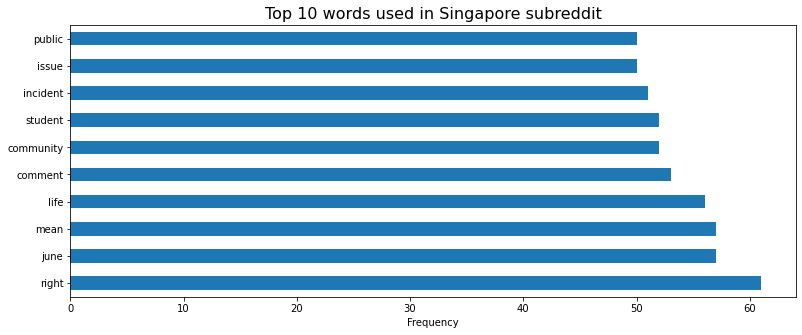

In [57]:
# singapore
dfb1 = dfb.drop(['ylabel'], axis = 1)
fig = plt.figure(figsize=(13, 5))
dfb1.sum().sort_values(ascending = False).head(10).plot.barh()
plt.title('Top 10 words used in Singapore subreddit', size = 16)
plt.xlabel('Frequency');

Common words that occur in both subreddits have been removed as stopwords as they are not informative. Words that are synonyms with both subreddits were also removed.

In [58]:
# coef for logistic regression
logreg1 = gs1_model.named_steps['lr']
coef_df1 = pd.DataFrame(data = np.exp(logreg1.coef_), columns = cvec1.get_feature_names(), index = ['e^coefficient']).T

In [59]:
# e^coefficients that are more than 1
coef_df1[coef_df1['e^coefficient'] > 1].sort_values(by = ['e^coefficient'], ascending = False)

,e^coefficient
june,1.689143
community,1.552815
wait,1.458979
mrt,1.423740
grc,1.415751
...,...
tech,1.001469
relevant,1.001396
australia,1.000753
main,1.000199


These are the features that will make Singapore more likely to happen than Japan.
How to read the coefficients are as follows:<br>
- For example, grc will make y = 1 (Singapore), 1.42 times more likely than y = 0 (Japan)
- The higher the coefficient, the better the prediction it has on y = 1 (Singapore)

For Singapore, top preditive words are june, community, wait, mrt, grc and pap.<br>
Grc represents Group Representation Constituency, where the general elections were just held last year 2020.<br>
Pap represents People Action Party, a major conservative centre-right political party in Singapore and is one of the three contemporary political parties represented in parliament.<br>
June is the current month from which I collected subreddit data.<br>

In [60]:
# e^coefficients that are less than 1
coef_df1[coef_df1['e^coefficient'] < 1].sort_values(by = ['e^coefficient'], ascending = True)

,e^coefficient
tokyo,0.288408
olympics,0.522696
osaka,0.558978
asahi,0.588541
olympic,0.607055
...,...
online,0.998708
extra,0.998835
agree,0.999243
spending,0.999597


These are the features that will make Japan more likely to happen than Singapore.
Tokyo will make y = 1 (Singapore), 0.28 times more likely than y = 0 (Japan). Hence, it is less likely to predict
Changing from Japan (reference level) to Singapore, would decrease the odds of 

#### Misclassified posts

In [61]:
# df of true y test vs predicted y test
pred1 = logreg1.predict(cvec1.transform(X_test))
pred_df = pd.DataFrame({'true_values': y_test,
                        'predicted_values': pred1})
pred_df

,true_values,predicted_values
801,1,1
356,1,1
104,1,1
1670,0,1
936,1,1
...,...,...
852,1,0
532,1,1
1735,0,0
1320,0,0


In [62]:
def condition(df):
    """return 1 if predicted values different from true values"""
    if df['predicted_values'] == df['true_values']:
        return 0
    else:
        return 1

In [63]:
# create new column of misclassified y
pred_df['diff'] = pred_df.apply(condition, axis = 1)

# posts predicted wrongly
pred_df[pred_df['diff'] == 1]

,true_values,predicted_values,diff
1670,0,1,1
1483,0,1,1
1264,0,1,1
1596,0,1,1
1284,0,1,1
...,...,...,...
350,1,0,1
1757,0,1,1
1411,0,1,1
1452,0,1,1


In [64]:
# posts that were misclassified
pd.set_option('display.max_colwidth', None)
check = merged.loc[pred_df[pred_df['diff'] == 1].index.to_list()][['col_final']]
A = check['col_final']

# df of misclassified words
cv = CountVectorizer()
A_df = pd.DataFrame(cv.fit_transform(A).toarray(), columns = cv.get_feature_names())
A_df

,abandonment,abe,aboard,academy,accuse,across,act,activist,actual,actually,add,ago,ahead,aid,aim,air,alleged,alliance,allow,almost,also,alternative,america,amid,amount,ancestor,ancestry,another,anti,anybody,anyone,anything,apart,apartment,appeal,approve,april,architectural,argentina,armor,around,arrive,asian,aside,aspect,assembly,attempt,attic,augment,aunt,australia,auto,autonomic,awhile,awkward,axe,back,ban,bar,barrel,base,battery,battle,bay,beat,beautiful,beauty,become,behalf,benkei,best,bet,beyond,bin,biological,bit,biwa,blinken,blumenau,boat,boiling,book,bowls,box,brazil,buenos,building,bullying,burakumin,burner,cabinet,cake,call,calm,camera,campaign,candy,carp,cb,cctv,center,ceo,certain,certify,chain,challenge,chan,channel,chase,check,china,chun,circumference,citizen,civil,claim,class,classroom,climate,climb,clue,clutter,collide,combat,comeback,comment,commit,common,community,compare,comparison,complete,completely,concrete,condition,confirm,confirmation,confuse,consider,constantly,constitution,controversy,convention,cop,coronavirus,corporal,corporate,corpse,corpses,correct,could,council,courage,course,court,courtesy,cove,cover,crayon,create,crime,crisis,criterion,crowdfunding,cult,curious,current,daimonji,daughter,dead,deal,death,debate,decarbonization,decay,decide,decline,deer,degree,demo,demon,design,despite,det,detainee,detention,determine,developed,development,dhc,die,difference,direct,discipline,discover,discriminate,discriminatory,disrespect,dock,docomo,document,donald,dorm,dos,doubt,drewfurion,drive,drop,duel,dump,dystopian,earthquake,eat,economy,edgy,egg,eight,elderly,elect,election,else,emergency,employee,employer,empress,end,english,enough,ensure,entire,episode,equally,equipment,equivalent,especially,esque,estate,etc,evaluate,even,eventuality,ever,every,everyone,everything,everywhere,ex,examiner,example,executive,exit,expect,expert,extended,extra,eye,face,facility,faded,failed,fairly,fake,false,falsify,famous,farer,fatigue,favorite,fb,fellow,female,ferment,ferry,fertility,festival,fi,file,fill,film,find,finish,fire,firearm,firm,first,fishing,flag,flare,flattering,flip,floor,foggy,footage,force,forensic,form,former,fraud,fray,freeze,freshwater,friburgo,friendly,frigate,fuji,fukushima,funazushi,garden,gear,general,genocide,genuine,german,ghost,girl,give,globe,gloss,go,gorgeous,government,graffiti,grant,gray,great,greet,grey,grid,grind,grope,ground,grow,guangdong,gun,guy,haha,hail,hajichi,half,handle,handwriting,hang,hanko,hankos,happy,hated,hatoyama,hawaii,head,headband,health,hear,hearn,heart,hedge,height,heirs,hi,hide,hip,history,hitachi,hole,home,hong,hop,hour,house,houston,however,huge,hypothetical,ideal,image,imagine,immigration,import,incense,incident,include,indian,indicate,indict,indigenous,industrial,inflexibility,infraatructure,institution,intend,interested,intern,international,introduce,issue,ivory,jap,japanease,jewel,johor,join,journalist,july,june,kill,kind,kmt,kong,konger,kyoto,lab,lack,lafcadio,lake,lankan,large,last,late,later,launch,ldp,lead,leader,leak,learn,least,lecturer,legend,legendary,levy,lga,liberate,life,lifeless,lift,likely,line,link,lo,lock,lol,lose,love,luck,mail,mainichi,male,manager,manga,many,marx,mask,mass,mat,may,maybe,mean,meet,member,memoir,mental,mention,mess,mexican,mexicans,mexico,mil,minesweeper,minister,miserable,miss,mith,mitsui,miyamoto,mock,model,mom,monday,morrison,motegi,mount,mountain,move,movie,mp,mt,much,multicultural,municipality,musashi,music,musical,myanmar,name,naomi,nara,nation,national,nazi,ndp,negative,neo,nervous,news,newspaper,nhk,nice,nindo,ninja,nobunaga,noguchi,non,normal,nova,november,nowadays,ntuc,nuclear,obama,october,oda,offend,offender,officer,official,og,oh,ok,okinawa,online,open,opinion,opportunity,opposition,orphanage,osaka,outside,outsider,overboard,overbuilt,overstate,overstay,owner,pandemic,paris,park,part,particoular,particular,party,passenger,passport,past,paved,per,performance,pfizer,phd,physically,picture,pineapple,pitch,plagiarism,plan,pl

In [65]:
# words misclassified
words = []
for i in cvec1.get_feature_names():
    for j in cv.get_feature_names():
        if i == j:
            words.append(i)
print(words)

['accuse', 'act', 'actually', 'add', 'ago', 'ahead', 'air', 'allow', 'alternative', 'america', 'amid', 'anti', 'anybody', 'appeal', 'april', 'australia', 'ban', 'bar', 'base', 'battle', 'bay', 'beat', 'best', 'bit', 'book', 'box', 'building', 'campaign', 'center', 'certain', 'challenge', 'check', 'china', 'citizen', 'claim', 'class', 'comment', 'commit', 'common', 'community', 'compare', 'complete', 'completely', 'condition', 'confirm', 'confuse', 'consider', 'constantly', 'cop', 'coronavirus', 'correct', 'course', 'court', 'cover', 'create', 'crisis', 'curious', 'current', 'deal', 'death', 'debate', 'decide', 'degree', 'design', 'despite', 'die', 'difference', 'dos', 'doubt', 'drive', 'drop', 'eat', 'economy', 'elderly', 'election', 'emergency', 'employee', 'employer', 'end', 'english', 'ensure', 'entire', 'especially', 'example', 'expect', 'expert', 'extra', 'eye', 'face', 'famous', 'fellow', 'female', 'file', 'film', 'finish', 'flag', 'force', 'form', 'garden', 'general', 'girl', 'g

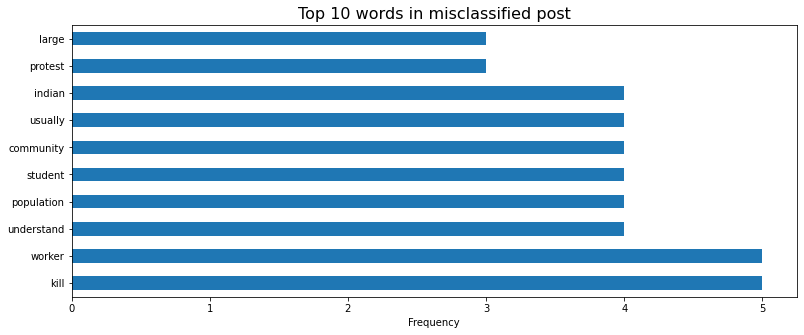

In [66]:
# top counts for misclassified words
fig = plt.figure(figsize=(13, 5))
A_df[words].sum().sort_values(ascending = False).head(10).plot.barh()
plt.title('Top 10 words in misclassified post', size = 16)
plt.xlabel('Frequency');

All misclassified words with frequency of more than 5 are removed in the stopwords.

Misclassification analysis was done on the test set as when tried on the train set, it produces more overfitting effects.

#### Pipe 2 - with TF-IDF Vectorizer

In [67]:
# search over following hyperparameters
pipe_params_2 = {
    'tvec__max_features': [800, 1000], # max number of features fit
    'tvec__min_df': [6, 7], # min number of documents needed to include token
    'tvec__max_df': [0.6, 0.7], # max number of documents needed to include token
    'tvec__ngram_range': [(1,1),(1,2)], # check individual tokens and 2-grams
    'tvec__stop_words': ['english', None],
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l2']
}

In [68]:
# gridsearch on pipe_2
gs2 = GridSearchCV(pipe_2, 
                   param_grid = pipe_params_2, 
                   cv= 5) 

In [69]:
# fit on train
gs2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2'],
                         'tvec__max_df': [0.6, 0.7],
                         'tvec__max_features': [800, 1000],
                         'tvec__min_df': [6, 7],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english', None]})

In [70]:
# cross validated best score
gs2.best_score_

0.717037037037037

In [71]:
# best hyperparameters
gs2.best_params_

{'lr__C': 1,
 'lr__penalty': 'l2',
 'tvec__max_df': 0.6,
 'tvec__max_features': 800,
 'tvec__min_df': 6,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [72]:
# save best model as gs_model
gs2_model = gs2.best_estimator_
gs2_model

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.6, max_features=800, min_df=6,
                                 ngram_range=(1, 2), stop_words='english')),
                ('lr', LogisticRegression(C=1))])

In [73]:
# accuracy score on test set
gs2_model.score(X_train, y_train)

0.8777777777777778

In [74]:
# accuracy score on test set
gs2_model.score(X_test, y_test)

0.7583148558758315

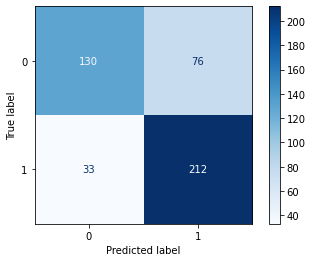

In [75]:
# confusion matrix of test dataset
plot_confusion_matrix(gs2_model.named_steps['lr'], gs2_model.named_steps['tvec'].transform(X_test), y_test, cmap='Blues', values_format='d');

In [76]:
# using optimize hyperparameters to get df of features
tvec2 = gs2_model.named_steps['tvec']

df_2 = pd.DataFrame(tvec2.fit_transform(X_train).toarray(),
                    columns = tvec2.get_feature_names())
df_2

,able,absolutely,abuse,accept,accord,account,act,action,activity,actually,add,address,admit,advance,affect,afraid,ago,agree,ahead,air,alert,allow,alternative,amazon,america,amid,anime,announce,answer,anti,anybody,anymore,anyways,apologise,app,apparently,appear,apple,apply,appreciate,approach,area,argument,art,asahi,asahi shimbun,assault,assume,attack,attend,attention,attract,australia,available,average,avoid,aware,away,background,ban,bank,bar,base,basic,begin,behaviour,believe,benefit,best,birthday,bit,black,blame,block,blood,body,book,bos,box,boy,breach,break,breaker,bridge,bring,brother,build,building,bukit,bukit merah,bunch,bus,business,cancel,care,carry,cash,casual,cat,catch,cause,center,centre,certain,certainly,chance,character,chat,cheap,check,china,chip,choice,choose,circumstance,citizen,citizenship,claim,clarify,class,clear,clinic,close,club,cluster,com,comment,commit,common,community,commute,compare,complain,complete,completely,concern,condition,confirm,consider,constantly,contact,context,continue,contribute,control,cool,coronavirus,correct,couple,course,court,cover,crash,cream,create,credit,crowd,cultural,curious,current,currently,customer,cut,daily,damn,data,date,db,deal,death,death ray,decade,decent,decide,decision,definitely,degree,delete,deliver,delivery,demand,design,despite,develop,die,difference,difficult,digital,directly,discussion,distance,doctor,dollar,donate,donation,dont,dose,dot,double,draw,drink,drive,driver,drop,drug,early,easily,east,easy,eat,economy,education,effect,effective,effort,elderly,election,email,embassy,emergency,employee,employer,end,english,enjoy,ensure,entire,entirely,environment,equal,especially,event,eventually,exactly,example,exist,expect,expert,explain,extend,extra,eye,face,facebook,fact,fail,fair,fall,family,fan,far,fast,father,fee,feeling,fellow,felt,female,fight,figure,file,film,finally,fine,fix,flag,fly,focus,food,football,force,foreigner,forget,form,forward,free,fresh,fuck,fully,fun,fund,future,gain,game,gay,general,generally,generation,giant,gift,girl,google,gov,government,graduate,grc,grc death,great,greatly,grow,guard,guess,guy,half,hand,handle,happen,happy,harassment,hard,harmony,hawker,hdb,head,health,hear,heart,heighten,heighten alert,hell,hello,hey,hi,hide,history,hit,hold,holiday,home,honestly,hop,hospital,hot,hour,house,housing,huge,human,identify,illegal,im,imagine,immediately,import,important,improve,incident,include,income,increase,indian,individual,industry,infection,info,inside,instagram,instead,interested,international,internet,interview,involve,issue,item,ive,jail,join,joke,june,kang,kind,knowledge,korea,korean,lack,language,large,late,later,laugh,law,lead,leader,learn,legal,letter,level,lgbt,license,lie,life,lifestyle,light,likely,limit,line,link,list,listen,literally,living,location,lol,longer,lose,love,low,machine,main,major,majority,malay,malaysia,male,mall,manage,management,mandatory,market,mask,mass,match,matter,maybe,mean,measure,medical,medium,meet,member,men,mental,mental health,mention,merah,merah view,message,method,middle,military,min,mind,minister,minute,miss,mistake,moderna,moh,mom,moment,morning,mother,movie,mrt,national,nature,nd,near,negative,neighbourhood,network,news,nice,night,non,normal,north,note,notice,nurse,obviously,offer,office,officer,official,okay,olympic,olympics,online,open,opinion,opportunity,opposition,option,orchard,original,osaka,outside,overseas,owner,pa,page,pandemic,pap,park,particular,partner,party,past,patient,payment,peace,perfect,perform,period,personal,personally,phase,photo,physical,pick,picture,piece,plan,platform,play,player,pm,policy,polite,politician,politics,poor,popular,population,position,positive,possible,possibly,potential,power,practice,prefecture,prepare,pretty,prevent,previous,previously,primary,prime,private,pro,probably,problem,process,product,professional,project,promote,proper,protest,provide,psa,public,purchase,purpose,push,quarantine,quick,quite,race,racial,racial harmony,racism,raise,random,rant,rare,r

In [77]:
# coef for logistic regression
logreg2 = gs2_model.named_steps['lr']
coef_df2 = pd.DataFrame(data = np.exp(logreg2.coef_), columns = tvec2.get_feature_names(), index = ['e^coefficient']).T

In [78]:
# e^coef more than 1 -> singapore more likely
coef_df2[coef_df2['e^coefficient'] > 1].sort_values(by = ['e^coefficient'], ascending = False)

,e^coefficient
community,5.782263
june,5.459524
wait,3.936484
jail,3.801227
mrt,3.536804
...,...
attract,1.005254
rid,1.004830
anti,1.002143
population,1.001529


These are the features that will make Singapore more likely to happen than Japan.
Just like to previous logistic regression coefficients in pipe 1, the word 'community' will make y = 1 (Singapore), 5.78 times more likely than y = 0 (Japan)

In [79]:
# e^coef of less than 1 -> japan more likely
coef_df2[coef_df2['e^coefficient'] < 1].sort_values(by = ['e^coefficient'], ascending = True)

,e^coefficient
tokyo,0.029825
osaka,0.126447
olympics,0.128883
taiwan,0.170589
olympic,0.178975
...,...
view,0.996110
request,0.996802
early,0.997813
fly,0.997995


These are the coefficients that will make Japan more likely to happen than Singapore.
Similarly, olympics will make y = 1 (Singapore), 0.13 times more likely than y = 0 (Japan).

### Multinomial Naive Bayes

#### Pipe 3 - with Count Vectorizer

In [80]:
# search over following hyperparameters
pipe_params_3 = {
    'cvec__max_features': [800, 1000], # max number of features fit
    'cvec__min_df': [7, 8], # min number of documents needed to include token
    'cvec__max_df': [0.6, 0.7], # max number of documents needed to include token
    'cvec__ngram_range': [(1,1), (1,2)], # check individual tokens and 2-grams
    'cvec__stop_words': ['english', None],
    'nb__alpha': [0.1, 0.5, 1]
}

In [81]:
# gridsearch on pipe_3
gs3 = GridSearchCV(pipe_3,
                   param_grid = pipe_params_3,
                   cv = 5)

In [82]:
# fit on train
gs3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.6, 0.7],
                         'cvec__max_features': [800, 1000],
                         'cvec__min_df': [7, 8],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'nb__alpha': [0.1, 0.5, 1]})

In [83]:
# cv score
gs3.best_score_

0.7162962962962963

In [84]:
# best hyperparameters
gs3.best_params_

{'cvec__max_df': 0.6,
 'cvec__max_features': 800,
 'cvec__min_df': 8,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'nb__alpha': 0.5}

In [85]:
# save best model as gs_model
gs3_model = gs3.best_estimator_
gs3_model

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.6, max_features=800, min_df=8,
                                 ngram_range=(1, 2))),
                ('nb', MultinomialNB(alpha=0.5))])

In [86]:
# accuracy score on train set
gs3_model.score(X_train, y_train)

0.7866666666666666

In [87]:
# accuracy score on test set
gs3_model.score(X_test, y_test)

0.7560975609756098

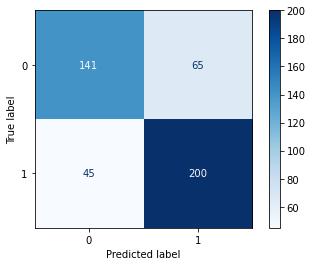

In [88]:
# confusion matrix of test dataset
plot_confusion_matrix(gs3_model.named_steps['nb'], gs3_model.named_steps['cvec'].transform(X_test), y_test, cmap='Blues', values_format='d');

In [89]:
# df of features
cvec3 = gs3_model.named_steps['cvec']

df_3 = pd.DataFrame(cvec3.fit_transform(X_train).toarray(), columns = cvec3.get_feature_names())
df_3

,able,absolutely,accept,accord,account,across,act,action,activity,actually,add,address,admit,advance,affect,afraid,ago,agree,ahead,alert,allow,almost,alone,along,already,also,although,always,amazon,america,amid,among,amount,anime,announce,another,answer,anti,anybody,anymore,anyone,anyone else,anything,anything go,anyway,anyways,anywhere,app,apparently,appear,apply,appreciate,area,argument,around,art,asahi,asahi shimbun,assume,attack,attract,available,average,avoid,aware,away,back,background,ban,bank,base,basic,become,begin,behaviour,behind,believe,benefit,best,bit,black,blame,block,blood,body,book,box,boy,breach,break,bring,brother,build,building,bukit,bukit merah,bunch,bus,business,call,campaign,cancel,cannot,care,cash,cat,catch,cause,center,centre,certain,chance,character,chat,cheap,check,china,chip,choice,choose,circumstance,citizen,claim,clarify,class,clear,clinic,close,cluster,com,comment,common,community,compare,complain,complete,completely,concern,condition,confirm,consider,constantly,contact,context,continue,contribute,control,cool,coronavirus,correct,could,couple,course,court,cover,cream,create,credit,cultural,curious,current,currently,customer,cut,daily,data,date,deal,death,death ray,decade,decent,decide,decision,definitely,degree,delete,delivery,demand,describe,despite,detail,develop,die,difference,difficult,digital,discussion,doctor,dont,dose,dot,draw,drink,drive,driver,drop,drug,due,early,easily,east,easy,eat,education,effect,effort,either,elderly,else,email,emergency,employer,end,english,enjoy,enough,ensure,entire,equal,especially,etc,even,even though,event,eventually,ever,every,everyone,everything,exactly,example,exist,expect,expert,explain,extend,eye,face,facebook,fact,fail,fair,fall,family,fan,far,fast,father,fee,feeling,fellow,felt,female,fight,figure,fill,film,finally,find,fine,first,fix,flag,focus,food,force,foreigner,forget,form,forward,free,fresh,front,full,fully,fun,fund,future,gain,game,general,generally,generation,giant,girl,give,go,google,gov,government,grc,grc death,great,greatly,grow,guess,guy,half,hand,handle,happen,happy,hard,hawker,hdb,head,health,hear,heart,heighten,heighten alert,hell,hello,hence,hey,hi,hi everyone,hide,history,hit,hold,home,honestly,hop,hospital,hour,house,however,huge,human,illegal,im,imagine,immediately,import,important,improve,incident,include,increase,indian,individual,industry,infection,info,inside,instagram,instead,interest,interested,international,internet,involve,issue,item,jail,july,jump,june,keep,kind,knowledge,korea,korean,lack,language,large,last,late,later,laugh,law,lead,leader,learn,least,legal,less,letter,level,license,lie,life,light,likely,limit,line,link,list,literally,living,locally,location,lol,lose,love,low,main,major,majority,malay,mall,manage,management,mandatory,many,market,mask,mass,matter,may,maybe,mean,measure,medical,medium,meet,member,men,mental,mental health,mention,merah,merah view,message,middle,might,military,min,mind,minister,minute,miss,mistake,mix,moderna,moh,mom,moment,morning,mostly,mother,move,movie,mrt,much,must,name,national,near,negative,never,news,next,nice,night,nobody,non,none,normal,north,note,nothing,notice,nurse,obviously,offer,office,official,often,okay,olympic,olympics,online,open,opinion,opportunity,opposition,option,original,osaka,others,outside,overseas,page,pandemic,pap,park,part,particular,partner,party,past,patient,peace,per,perfect,perform,period,personal,personally,phase,photo,physical,pick,picture,piece,plan,platform,play,please,please polite,pm,policy,polite,polite random,poor,popular,population,position,positive,possible,possibly,potential,power,pr,practice,prepare,pretty,prevent,previous,previously,primary,private,pro,probably,problem,process,product,project,promote,proper,protest,provide,psa,public,purchase,purpose,push,put,quarantine,quick,quite,race,racial,racism,raise,random,random discussion,rant,rare,rate,rather,ray,reach,ready,realise,realize,reason,recent,recently,recommend,record,red,reddit,redditors,reduce,

#### Predictive words in each subreddit

In [90]:
neg_class_prob_sorted = gs3_model.named_steps['nb'].feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = gs3_model.named_steps['nb'].feature_log_prob_[1, :].argsort()[::-1]
print('Japan top predictive words are: \n' ,np.take(cvec3.get_feature_names(), neg_class_prob_sorted[:30]))
print('Singapore top predictive words are: \n',np.take(cvec3.get_feature_names(), pos_class_prob_sorted[:30]))

Japan top predictive words are: 
 ['go' 'find' 'tokyo' 'see' 'anyone' 'also' 'base' 'could' 'much' 'even'
 'english' 'back' 'olympics' 'well' 'many' 'please' 'call' 'first' 'take'
 'around' 'everyone' 'give' 'asahi' 'anything' 'still' 'name' 'show'
 'seem' 'osaka' 'thank']
Singapore top predictive words are: 
 ['go' 'even' 'also' 'see' 'many' 'take' 'give' 'find' 'much' 'well'
 'still' 'everyone' 'first' 'right' 'mean' 'june' 'life' 'could' 'call'
 'comment' 'please' 'anyone' 'student' 'community' 'incident' 'back'
 'however' 'seem' 'issue' 'around']


The above words are more general and some words even appeared in both the subreddits. This is because the grid searching for hyperparameters did not pick 'english' stopwords and hence, more generic words were included.

####  Pipe 4 - with TF-IDF Vectorizer

In [91]:
# search over following hyperparameters
pipe_params_4 = {
    'tvec__max_features': [800, 1000], # max number of features fit
    'tvec__min_df': [7, 8], # min number of documents needed to include token
    'tvec__max_df': [0.6, 0.7], # max number of documents needed to include token
    'tvec__ngram_range': [(1,1), (1,2)], # check individual tokens and 2-grams
    'tvec__stop_words': ['english', None],
    'nb__alpha': [0.5, 1]
}

In [92]:
# gridsearch on pipe_4
gs4 = GridSearchCV(pipe_4,
                   param_grid = pipe_params_4, 
                   cv = 5) 

In [93]:
# fit on train
gs4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.5, 1], 'tvec__max_df': [0.6, 0.7],
                         'tvec__max_features': [800, 1000],
                         'tvec__min_df': [7, 8],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english', None]})

In [94]:
# cv score
gs4.best_score_

0.7274074074074074

In [95]:
# best hyperparameters
gs4.best_params_

{'nb__alpha': 1,
 'tvec__max_df': 0.6,
 'tvec__max_features': 1000,
 'tvec__min_df': 7,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [96]:
# save best model as gs_model
gs4_model = gs4.best_estimator_
gs4_model

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.6, max_features=1000, min_df=7,
                                 ngram_range=(1, 2))),
                ('nb', MultinomialNB(alpha=1))])

In [97]:
# accuracy score on train set
gs4_model.score(X_train, y_train)

0.88

In [98]:
# accuracy score on test set
gs4_model.score(X_test, y_test)

0.7716186252771619

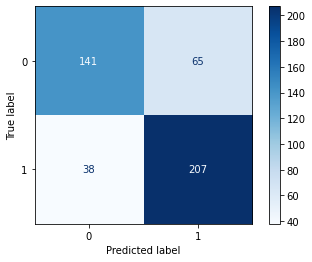

In [99]:
# confusion matrix of test dataset
plot_confusion_matrix(gs4_model.named_steps['nb'], gs4_model.named_steps['tvec'].transform(X_test), y_test, cmap='Blues', values_format='d');

In [100]:
# df of features
tvec4 = gs4_model.named_steps['tvec']

df_4 = pd.DataFrame(tvec4.fit_transform(X_train).toarray(), columns = tvec4.get_feature_names())
df_4

able  absolutely  abuse  accept  accord  account  across       act    action  activity  actually  add  address  admit  advance    affect  afraid  ago  agree  ahead      air  alert     allow  almost  alone  along   already      also  alternative  although  always  amazon  america  amid  among  amount  angry  anime  announce  another  answer  anti  anybody  anymore  anyone  anyone else  anything  anything go  anyway  anyways  anywhere  app  apparently  appeal  appear  apply  apply please  appointment  appreciate  approach  april  area  argument  arm   around  art     asahi  asahi shimbun  assume  attack  attend  attention  attract  australia  available  average     avoid  aware  away      back  background       ban  bank  bar      base  basic  basically  basis  beat  become  begin  behaviour  behind  believe   benefit      best      bill  bit  black  blame  block  blood  body  book  box  boy    breach  break  bridge  bring  brother     build  building  bukit  bukit merah     bunch  bus  business  call  campaign    cancel    cannot  capacity      care  carry     cash  cat  catch  cause  center    centre  century  certain  certainly  challenge    chance  character  chat  cheap     check  china  chip  choice    choose  circumstance  citizen  citizenship  claim  clarify  class  clear   clearly  clinic  close  club  cluster  com  comment  commit  common  community  commute  compare  complain  complete  completely  concern  condition  condo  confirm  confuse  consider  consideration  constantly  construction  contact  contain  context  continue  contract  contribute  control  conversation  cool  cop  coronavirus  correct  could  count  couple  course  court  cover  cream  create  credit  crisis  crowd  cry  cultural  curious   current  currently  customer       cut    daily  damn  data  date   db      deal     death  death ray  debate  decade  decent  decide  decision  defense  definitely  degree  delete  delivery  demand  depend  describe  design  despite    detail  develop  development  die  difference  difficult  digital    direct  disclaimer  discussion  discussion small  doctor  dollar  donation  dont  dos  dose  dot  double  doubt   dr  draw  drink  drive  driver  drop  drug  due  early  easily  east  easy  eat  economy  editorial  educate  education  effect  effective  effort    either  elderly  election  else  elsewhere  email  emergency  emotional  employ  employee  employer  encourage  end  english  enjoy    enough  ensure  enter    entire  entirely  environment  equal  especially  essentially       etc      even  even though  event  eventually  ever  every  everyone  everything  evidence  exactly  example     exist    expect  expensive  expert  explain  extend  eye      face  facebook  fact  factor  fail  fair  fall  family  famous  fan       far  fast  father  fear  fee  feedback  feeling  fellow  felt  female     fight  figure  file  fill  film  finally    find      fine  finish  fire     first  fix  flag  fly  focus  folk      food  football     force  foreigner  forget  form  former  forward  free  fresh  front  full  fully  fun  fund  future      gain      game  garden  general  generally  generation  giant  girl      give   go  go subreddit  google  gov  government  graduate  grc  grc death  great  greatly  grow  guess      guy  haha  half  hand  handle  happen     happy  hard  harmony  hawker  hdb  head    health  hear  heart  heighten  heighten alert  hell     hello  helpful     hence  hey   hi  hi everyone  hide  highly  history  hit  hold      home  honestly  hop  hopefully  hospital  hour  house  housing  however  huge  human  ice  illegal   im  imagine  immediately  import  important   improve  incident  include  income  increase  indian  individual  industry  infection  info  inside  instagram   instead  intend  interest  interested  international  internet  interview  involve     issue  item  ive  jab  jail  join   jp  july  jump      june  kang      keep  kill  kind  knowledge  korea  korean  lack  lady  lang

In [101]:
neg_class_prob_sorted = gs4_model.named_steps['nb'].feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = gs4_model.named_steps['nb'].feature_log_prob_[1, :].argsort()[::-1]
print('Japan top predictive words are: \n' ,np.take(tvec4.get_feature_names(), neg_class_prob_sorted[:30]))
print('Singapore top predictive words are: \n',np.take(tvec4.get_feature_names(), pos_class_prob_sorted[:30]))

Japan top predictive words are: 
 ['tokyo' 'find' 'olympics' 'olympic' 'go' 'anyone' 'asahi' 'osaka'
 'asahi shimbun' 'shimbun' 'taiwan' 'call' 'see' 'could' 'first' 'game'
 'korean' 'english' 'back' 'show' 'name' 'much' 'government' 'coronavirus'
 'give' 'please' 'suga' 'face' 'anime' 'many']
Singapore top predictive words are: 
 ['june' 'go' 'community' 'see' 'take' 'give' 'back' 'life' 'even' 'call'
 'guy' 'open' 'find' 'first' 'test' 'also' 'still' 'student' 'many'
 'racism' 'bus' 'link' 'everyone' 'wait' 'driver' 'well' 'public' 'jail'
 'infection' 'food']


The above words contain abit more specificity to each subreddit as TF-IDF Vectorizer was used. It made common words across all documents to be less important.

### Support Vector Classifier

#### Pipe 5 - with Count Vectorizer

In [102]:
pipe_params_5 = {
    'cvec__max_features': [800, 1000], # max number of features fit
    'cvec__min_df': [3, 4], # min number of documents needed to include token
    'cvec__max_df': [0.7, 0.8], # max number of documents needed to include token
    'cvec__ngram_range': [(1,1), (1,2)], # check individual tokens and 2-grams
    'cvec__stop_words': ['english', None],
    'svc__C': [0.1, 0.5],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [103]:
# gridsearch on pipe_5
gs5 = GridSearchCV(pipe5,
                   pipe_params_5,
                   cv = 5)

In [104]:
# fit on train
gs5.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('svc', SVC())]),
             param_grid={'cvec__max_df': [0.7, 0.8],
                         'cvec__max_features': [800, 1000],
                         'cvec__min_df': [3, 4],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'svc__C': [0.1, 0.5],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [105]:
# cv score
gs5.best_score_

0.7125925925925926

In [106]:
# best hyperparameters
gs5.best_params_

{'cvec__max_df': 0.7,
 'cvec__max_features': 800,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'svc__C': 0.5,
 'svc__kernel': 'linear'}

In [107]:
# save best model as gs_model
gs5_model = gs5.best_estimator_

In [108]:
# accuracy score on train set
gs5_model.score(X_train, y_train)

0.8866666666666667

In [109]:
# accuracy score on train set
gs5_model.score(X_test, y_test)

0.7339246119733924

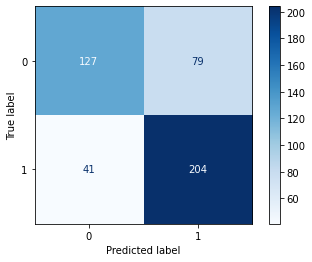

In [110]:
# confusion matrix of test dataset
plot_confusion_matrix(gs5_model.named_steps['svc'], gs5_model.named_steps['cvec'].transform(X_test), y_test, cmap='Blues', values_format='d');

#### Pipe 6 - with TF-IDF Vectorizer

In [111]:
# search over following hyperparameters
pipe_params_6 = {
    'tvec__max_features': [1000, 2000], # max number of features fit
    'tvec__min_df': [9, 10], # min number of documents needed to include token
    'tvec__max_df': [0.6, 0.7], # max number of documents needed to include token
    'tvec__ngram_range': [(1,1), (1,2)], # check individual tokens and 2-grams
    'tvec__stop_words': ['english', None],
    'svc__C': [0.1, 0.5, 1],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [112]:
# gridsearch on pipe_5
gs6 = GridSearchCV(pipe6,
                   pipe_params_6,
                   cv = 5)

In [113]:
# fit on train
gs6.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 0.5, 1],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tvec__max_df': [0.6, 0.7],
                         'tvec__max_features': [1000, 2000],
                         'tvec__min_df': [9, 10],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english', None]})

In [114]:
# cv score
gs6.best_score_

0.7096296296296296

In [115]:
# best hyperparameters
gs6.best_params_

{'svc__C': 0.5,
 'svc__kernel': 'sigmoid',
 'tvec__max_df': 0.6,
 'tvec__max_features': 1000,
 'tvec__min_df': 9,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [116]:
# save best model as gs_model
gs6_model = gs6.best_estimator_

In [117]:
# accuracy score on train set
gs6_model.score(X_train, y_train)

0.7881481481481482

In [118]:
# accuracy score on train set
gs6_model.score(X_test, y_test)

0.7583148558758315

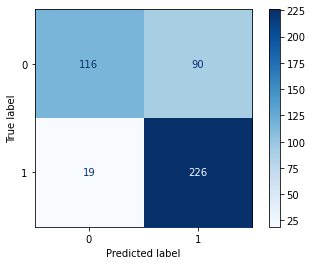

In [119]:
# confusion matrix of test dataset
plot_confusion_matrix(gs6_model.named_steps['svc'], gs6_model.named_steps['tvec'].transform(X_test), y_test, cmap='Blues', values_format='d');

In [120]:
# df of features
tvec6 = gs6_model.named_steps['tvec']

df_6 = pd.DataFrame(tvec6.fit_transform(X_train).toarray(), columns = tvec6.get_feature_names())
df_6

,able,absolutely,accept,account,across,act,action,actually,add,address,admit,advance,affect,afraid,ago,agree,ahead,alert,allow,almost,alone,along,already,also,always,amazon,america,amid,among,amount,anime,another,answer,anti,anybody,anymore,anyone,anyone else,anything,anything go,anyway,anywhere,app,apparently,appear,apply,appreciate,area,argument,around,asahi,asahi shimbun,assume,attack,attract,available,average,avoid,aware,away,back,background,ban,bank,base,become,begin,behaviour,behind,believe,benefit,best,bit,black,blame,block,blood,body,book,box,break,bring,build,bukit,bukit merah,bus,business,call,cancel,cannot,care,cash,catch,cause,center,centre,certain,chance,character,cheap,check,china,choice,choose,citizen,claim,class,clear,clinic,close,cluster,com,comment,common,community,compare,complete,completely,concern,condition,confirm,consider,contact,context,continue,contribute,control,cool,coronavirus,correct,could,couple,course,court,cover,cream,create,credit,cultural,curious,current,currently,customer,cut,daily,data,date,deal,death,death ray,decide,decision,definitely,degree,delete,delivery,demand,describe,despite,detail,develop,die,difference,difficult,discussion,doctor,dont,dose,draw,drink,drive,driver,drop,due,early,easily,east,easy,eat,education,either,elderly,else,email,emergency,end,english,enjoy,enough,ensure,entire,equal,especially,etc,even,even though,event,eventually,ever,every,everyone,everything,exactly,example,exist,expect,expert,explain,extend,eye,face,facebook,fact,fail,fall,family,fan,far,fast,father,feeling,fellow,felt,female,fight,figure,fill,film,finally,find,fine,first,fix,focus,food,force,foreigner,forget,form,forward,free,fresh,front,full,fully,fun,fund,future,gain,game,general,generally,girl,give,go,google,gov,government,grc,grc death,great,greatly,grow,guess,guy,half,hand,handle,happen,happy,hard,hawker,hdb,head,health,hear,heart,heighten,heighten alert,hell,hello,hence,hey,hi,hi everyone,hide,history,hit,hold,home,honestly,hop,hospital,hour,house,however,huge,human,im,immediately,important,improve,incident,include,increase,indian,individual,industry,infection,info,inside,instagram,instead,interest,interested,international,internet,involve,issue,item,jail,june,keep,kind,knowledge,korea,korean,lack,language,large,last,late,later,laugh,law,lead,learn,least,legal,less,letter,level,life,light,likely,limit,line,link,list,literally,living,location,lol,lose,love,low,main,major,majority,mall,manage,mandatory,many,market,mask,mass,matter,may,maybe,mean,measure,medical,medium,meet,member,men,mental,mental health,mention,merah,merah view,message,middle,might,military,min,mind,minister,minute,miss,moderna,moh,mom,moment,morning,mostly,mother,move,movie,mrt,much,must,name,national,near,negative,never,news,next,nice,night,non,none,normal,note,nothing,notice,nurse,obviously,offer,office,official,often,okay,olympic,olympics,online,open,opinion,opportunity,opposition,option,original,osaka,others,outside,overseas,pandemic,pap,park,part,particular,party,past,per,perfect,period,personal,personally,phase,photo,physical,pick,picture,piece,plan,play,please,pm,policy,polite,poor,popular,population,position,positive,possible,potential,power,practice,prepare,pretty,prevent,previous,previously,primary,private,pro,probably,problem,process,product,project,promote,proper,protest,provide,psa,public,purchase,push,put,quarantine,quick,quite,race,racial,racism,raise,random,rant,rare,rate,rather,ray,reach,ready,realise,realize,reason,recent,recently,recommend,record,red,reddit,redditors,reduce,refuse,regard,regular,relate,release,religious,remain,remember,reply,report,require,research,resident,respect,respond,response,rest,restaurant,result,return,review,rid,ride,rider,right,rise,risk,road,role,room,round,run,safe,salary,sale,save,saw,scene,search,second,secondary,see,seek,seem,self,sell,send,serious,seriously,serve,set,several,sex,share,shimbun,shock,shop,short,shot,show,side,sign,significant,similar,simply,since,single,site,situat

### Random Forest

#### Pipe 7 - with Count Vectorizer

In [127]:
# search over following hyperparameters
pipe_params_7 = {
    'cvec__max_features': [1000, 2000], # max number of features fit
    'cvec__min_df': [2, 3], # min number of documents needed to include token
    'cvec__max_df': [0.8, 0.9], # max number of documents needed to include token
    'cvec__ngram_range': [(1,1), (1,2)], # check individual tokens and 2-grams
    'cvec__stop_words': ['english', None],
    'rf__n_estimators': [400, 500],
    'rf__max_depth': [20, 22],
    'rf__max_features': ['sqrt', 'log2']
}

In [128]:
gs7 = GridSearchCV(pipe7,
                   pipe_params_7,
                   cv = 5)

In [129]:
# Fit model.
gs7.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.8, 0.9],
                         'cvec__max_features': [1000, 2000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'rf__max_depth': [20, 22],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': [400, 500]})

In [130]:
# best hyperparameters
gs7.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 1000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'rf__max_depth': 22,
 'rf__max_features': 'sqrt',
 'rf__n_estimators': 500}

In [131]:
# save best model as gs_model
gs7_model = gs7.best_estimator_

In [132]:
# cv score
gs7.best_score_

0.7207407407407407

In [133]:
# evaluate model on train set
gs7_model.score(X_train, y_train)

0.7911111111111111

In [134]:
# evaluate model on test set
gs7_model.score(X_test, y_test)

0.7272727272727273

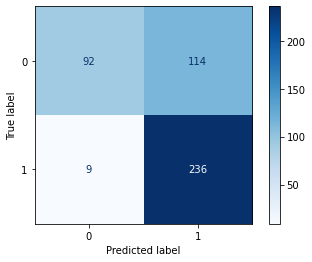

In [135]:
# confusion matrix of test dataset
plot_confusion_matrix(gs7_model.named_steps['rf'], gs7_model.named_steps['cvec'].transform(X_test), y_test, cmap='Blues', values_format='d');

In [136]:
# top 15 feature importance
gs7_fi = pd.DataFrame(gs7_model.named_steps['rf'].feature_importances_, index = gs7_model.named_steps['cvec'].get_feature_names(), columns = ['feature importance'])
gs7_fi.sort_values(by = 'feature importance', ascending = False).head(15)

,feature importance
tokyo,0.089583
olympics,0.034090
osaka,0.029871
asahi,0.022911
olympic,0.021803
asahi shimbun,0.019435
june,0.019181
shimbun,0.018817
taiwan,0.014058
english,0.013157


The above shows the relative importance of features. The higher the number, the more important it is in the classification task.

#### Pipe 8 - with TF-IDF Vectorizer

In [137]:
# search over following hyperparameters
pipe_params_8 = {
    'tvec__max_features': [1000, 2000], # max number of features fit
    'tvec__min_df': [2, 3], # min number of documents needed to include token
    'tvec__max_df': [0.8, 0.9], # max number of documents needed to include token
    'tvec__ngram_range': [(1,1), (1,2)], # check individual tokens and 2-grams
    'tvec__stop_words': ['english', None],
    'rf__n_estimators': [600, 700],
    'rf__max_depth': [24, 26],
    'rf__max_features': ['sqrt', 'log2']
}

In [138]:
gs8 = GridSearchCV(pipe8,
                   pipe_params_8,
                   cv = 5)

In [139]:
# Fit model.
gs8.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [24, 26],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': [600, 700],
                         'tvec__max_df': [0.8, 0.9],
                         'tvec__max_features': [1000, 2000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english', None]})

In [140]:
# best hyperparameters
gs8.best_params_

{'rf__max_depth': 26,
 'rf__max_features': 'sqrt',
 'rf__n_estimators': 700,
 'tvec__max_df': 0.9,
 'tvec__max_features': 1000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [141]:
# save best model as gs_model
gs8_model = gs8.best_estimator_

In [142]:
# cv score
gs8.best_score_

0.7162962962962963

In [143]:
# evaluate model on train set
gs8_model.score(X_train, y_train)

0.8088888888888889

In [144]:
# evaluate model on test set
gs8_model.score(X_test, y_test)

0.7161862527716186

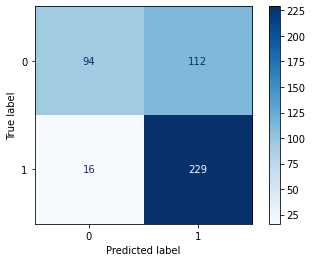

In [145]:
# confusion matrix of test dataset
plot_confusion_matrix(gs8_model.named_steps['rf'], gs8_model.named_steps['tvec'].transform(X_test), 
                      y_test, cmap = 'Blues', values_format = 'd');

In [146]:
# top 15 feature importance
gs8_fi = pd.DataFrame(gs8_model.named_steps['rf'].feature_importances_, index = gs8_model.named_steps['tvec'].get_feature_names(), columns = ['feature importance'])
gs8_fi.sort_values(by = 'feature importance', ascending = False).head(15)

,feature importance
tokyo,0.082965
olympics,0.032233
find,0.026312
osaka,0.025946
olympic,0.022736
june,0.020144
asahi,0.019336
taiwan,0.018114
shimbun,0.017461
english,0.017077


The above shows the relative importance of features. The higher the number, the more important it is in the classification task.
Top 7 have the same rank as pipe 7 (count vectorizer)

## Evaluation and Conclusions

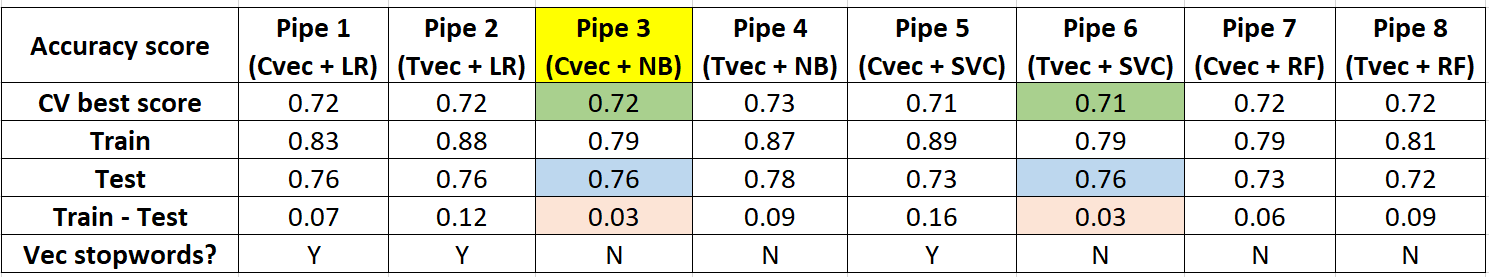

There is a close fight between Multinomial Naive Bayes (NB)(Pipe3) and Support Vector Classifier (SVC)(Pipe 6). NB had a slightly higher cross-validated best score, which was the model's ability to generalize on unseen data. Both Pipe 3 and Pipe 6 had the least overfitting on train dataset compared to the test dataset. They also chose not to include the vectorizer 'english' stopwords as a hyperparameter.
For pipe 4, although it has the best cross-validation score on unseen data, the train and test score showed that the model was more overfitted on the train dataset.<br>
All models beat the baseline accuracy of 0.54. Hence, they are all still better than average.

Another discovery was that for pipes using Count Vectorizer, if they do not include the vectorizer's 'english' stopwords as their hyperparameters, they would produce more generic words as predictive features, while TF-IDF does not seem to be affected by it. TF-IDF has the abilty to reduce the importance of the common generic words but not count vectorizer.

The Multinomial Naive Bayes model was the most outstanding and should be used to archive the old posts into the appropriate new subreddits. Compared to the rest, it handled unseen data well and balanced the tradeoff between bias/variance the best among the eight pipes. It is possible to use only raw text as input for making predictions. However if given more time, exploring new features apart from selftext and title could help. Also, more exploration on complex POS tagging and misclassified words from other models could be ventured into.